In [15]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [7]:
# Einlesen der Daten
haushalte = pd.read_csv("Data/haushalte.csv", sep=";", encoding='ISO-8859-1')
fahrzeuge = pd.read_csv("Data/fahrzeuge.csv", sep=";", encoding='ISO-8859-1')

C:\Users\larim\AppData\Local\Temp\ipykernel_15888\266891642.py:2: DtypeWarning: Columns (53,66) have mixed types. Specify dtype option on import or set low_memory=False.
  haushalte = pd.read_csv("Data/haushalte.csv", sep=";", encoding='ISO-8859-1')


In [10]:
# fehlende Effizienz mit Effizienzklasse D ersetzen
fahrzeuge['mf_eekat'] = fahrzeuge['mf_eekat'].fillna('D')

# Fahrzeuge nach Haushalt, Art und Effizienz sortieren
fz_sorted = fahrzeuge.sort_values(by=['HHNR', 'fahrzeugart', 'mf_eekat'], ascending=[True, True, False])

# pro Haushalt nur erstes Fahrzeug behalten (Auto, falls Auto und Motorrad / schlechteste Effizienz, falls mehrere Autos, etc.)
fz_agg = fz_sorted.groupby('HHNR').first().reset_index()

fz_agg.head()

,HHNR,WM,fznum,fahrzeugart,f30400,f30600_31500,f30601_31501,f30700_hpnr1,f30700_hpnr2,f30700_hpnr3,...,mf_gege1,mf_zylin,mf_nuzla,Leergew,mf_antri,mf_leikw,mf_co2wt,mf_tysnr,ET_Verbrauch,EL_Verbrauch
0,110001,1.391603,2,1,1,-97,-99,2,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,1LD822,-99.0,-99.0
1,110008,0.484276,1,1,1,2012,9,1,2,-99,...,2050,4,504,1546.0,1,14700,155,1CE433,6.7,-99.0
2,110011,0.161184,1,1,1,-97,-99,3,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,None,-99.0,-99.0
3,110026,1.036084,1,2,-99,2015,-99,-99,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,None,-99.0,-99.0
4,110027,0.584383,3,1,1,-97,-99,3,-99,-99,...,-99,-99,-99,-99.0,-99,-99,-99,1HA350,-99.0,-99.0


In [20]:
# Umbennen der Spalten
fz_agg = fz_agg.rename(columns={
    "HHNR": "Haushaltsnummer",
    "WM": "Haushaltsgewicht",
    "fznum": "Fahrzeugnummer",
    "fahrzeugart": "Fahrzeugtyp",
    "f30400": "Treibstoff",
    "f30600_31500": "Inverkehrssetzung_Jahr",
    "f30601_31501": "Inverkehrssetzung_Monat",
    "f30700_hpnr1": "Hauptfahrer_1",
    "f30700_hpnr2": "Hauptfahrer_2",
    "f30700_hpnr3": "Hauptfahrer_3",
    "f30700_hpnr4": "Hauptfahrer_4",
    "f30700_hpnr5": "Hauptfahrer_5",
    "f30800_31600": "Kilometerstand",
    "f30900_31700": "Km_letzte_12_Monate",
    "f31000_31800": "Km_Ausland",
    "f31400": "Hubraum",
    "mofis": "MOFIS_Abfrage",
    "mf_eekat": "Effizienzklasse",
    "mf_emcod": "Emissionscode",
    "mf_getri": "Getriebe",
    "mf_gege1": "Gesamtgewicht",
    "mf_zylin": "Zylinder",
    "mf_nuzla": "Nutzlast",
    "Leergew": "Leergewicht",
    "mf_antri": "Antriebsart",
    "mf_leikw": "Motorleistung",
    "mf_co2wt": "CO2_Ausstoss",
    "mf_tysnr": "Typenscheinnr",
    "ET_Verbrauch": "Verbrauch_NEFL_l_100km",
    "EL_Verbrauch": "Verbrauch_NEFL_kWh_100km"
})

In [21]:
fz_agg.head()

,Haushaltsnummer,Haushaltsgewicht,Fahrzeugnummer,Fahrzeugtyp,Treibstoff,Inverkehrssetzung_Jahr,Inverkehrssetzung_Monat,Hauptfahrer_1,Hauptfahrer_2,Hauptfahrer_3,...,Zylinder,Nutzlast,Leergewicht,Antriebsart,Motorleistung,CO2_Ausstoss,Typenscheinnr,Verbrauch_NEFL_l_100km,Verbrauch_NEFL_kWh_100km,Cluster
0,110001,1.391603,2,1,1,-97,-99,2,-99,-99,...,-99,-99,-99.0,-99,-99,-99,1LD822,-99.0,-99.0,2
1,110008,0.484276,1,1,1,2012,9,1,2,-99,...,4,504,1546.0,1,14700,155,1CE433,6.7,-99.0,0
2,110011,0.161184,1,1,1,-97,-99,3,-99,-99,...,-99,-99,-99.0,-99,-99,-99,None,-99.0,-99.0,2
3,110026,1.036084,1,2,-99,2015,-99,-99,-99,-99,...,-99,-99,-99.0,-99,-99,-99,None,-99.0,-99.0,4
4,110027,0.584383,3,1,1,-97,-99,3,-99,-99,...,-99,-99,-99.0,-99,-99,-99,1HA350,-99.0,-99.0,2


In [26]:
# Nur Autos fürs Clustering verwenden
fz_auto = fz_agg[fz_agg['Fahrzeugtyp'] == 1]

c:\Users\larim\anaconda3\envs\fall_sem_23\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Hubraum']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


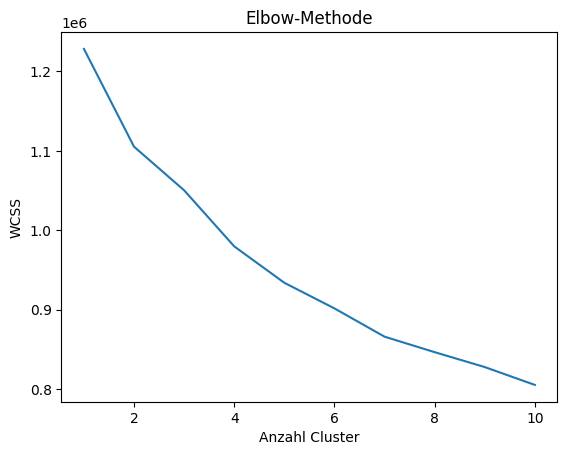

In [45]:
relevant_columns = ['Treibstoff', 'Inverkehrssetzung_Jahr', 'Inverkehrssetzung_Monat', 'Kilometerstand',
                    'Hubraum',
                    'Gesamtgewicht', 'Zylinder', 'Nutzlast', 'Leergewicht', 'Motorleistung', 'CO2_Ausstoss',
                    'Verbrauch_NEFL_l_100km', 'Verbrauch_NEFL_kWh_100km']

# Clustering mit relevanten Spalten
fz_cluster = fz_auto[relevant_columns]

# Numerische Spalten selektieren
fz_numeric = fz_auto.select_dtypes(include=['number'])

# Negative Werte durch NaN ersetzen
fz_numeric[fz_numeric < 0] = None

# Imputation von fehlenden Werten
imputer = SimpleImputer(strategy='most_frequent')
fz_cluster_imputed = imputer.fit_transform(fz_numeric)

# Standardisierung der Daten
scaler = StandardScaler()
fz_cluster_scaled = scaler.fit_transform(fz_cluster_imputed)

# Clustering mit KPrototypes und Beurteilung nach Elbow-Methode
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(fz_cluster_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow-Methode')
plt.xlabel('Anzahl Cluster')
plt.ylabel('WCSS')
plt.show()


In [46]:
# Clustering mit 4 Clustern
kmeans = KMeans(n_clusters=6, random_state=0)
fz_cluster['Cluster'] = kmeans.fit_predict(fz_cluster_scaled)

C:\Users\larim\AppData\Local\Temp\ipykernel_15888\2968631073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fz_cluster['Cluster'] = kmeans.fit_predict(fz_cluster_scaled)


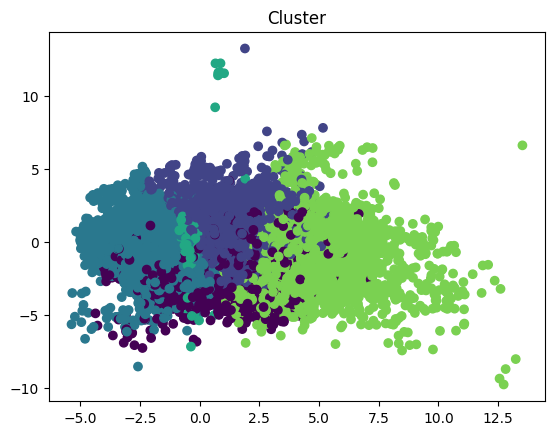

In [47]:
# Visualisierung der Cluster
pca = PCA(n_components=2)
fz_cluster_pca = pca.fit_transform(fz_cluster_scaled)

plt.scatter(fz_cluster_pca[:, 0], fz_cluster_pca[:, 1], c=fz_cluster['Cluster'])
plt.title('Cluster')
plt.show()